In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Gen_lattice(n,prob):    
    indices = [0, 1]
    prb=[prob, 1-prob]
    matrix = np.empty((n, n), dtype=object)
    for i in range(n):
        for j in range(n):
            random_index = np.random.choice(indices,p=prb)
            if random_index == 0:
                matrix[i, j] = np.array([(0, 1)])[0]
            else:
                matrix[i, j] = np.array([(1, 0)])[0]
    return(matrix)

# Display the matrix
print(Gen_lattice(10,0.75))




[[array([0, 1]) array([0, 1]) array([0, 1]) array([1, 0]) array([0, 1])
  array([0, 1]) array([1, 0]) array([0, 1]) array([0, 1]) array([1, 0])]
 [array([1, 0]) array([0, 1]) array([1, 0]) array([0, 1]) array([0, 1])
  array([0, 1]) array([0, 1]) array([0, 1]) array([0, 1]) array([0, 1])]
 [array([0, 1]) array([0, 1]) array([1, 0]) array([0, 1]) array([1, 0])
  array([0, 1]) array([1, 0]) array([0, 1]) array([0, 1]) array([0, 1])]
 [array([0, 1]) array([0, 1]) array([0, 1]) array([0, 1]) array([0, 1])
  array([0, 1]) array([1, 0]) array([0, 1]) array([0, 1]) array([0, 1])]
 [array([1, 0]) array([1, 0]) array([0, 1]) array([1, 0]) array([1, 0])
  array([0, 1]) array([1, 0]) array([0, 1]) array([0, 1]) array([1, 0])]
 [array([0, 1]) array([0, 1]) array([0, 1]) array([0, 1]) array([0, 1])
  array([0, 1]) array([1, 0]) array([1, 0]) array([1, 0]) array([0, 1])]
 [array([0, 1]) array([0, 1]) array([0, 1]) array([0, 1]) array([1, 0])
  array([0, 1]) array([0, 1]) array([0, 1]) array([1, 0]) 

In [3]:
def get_energy_array(lattice):
    n=len(lattice)
    arr=np.zeros((n-2,n-2))
    for i in range(n-2):
        for j in range(n-2):
            arr[i][j]=np.dot((lattice[i+1][j+1]),((lattice[i+1][j+2]+lattice[i+1][j])+(lattice[i+2][j+1]+lattice[i][j+1])))
    return(arr)



In [4]:
get_energy_array(matrix)

NameError: name 'matrix' is not defined

In [5]:
def get_energy(lattice):
    return get_energy_array(lattice).sum()

def get_dE_arr(lattices):
    return -2*get_energy_array(lattices)

In [6]:
get_energy(matrix)
get_dE_arr(matrix)

NameError: name 'matrix' is not defined

In [7]:
def flip_spin(s):
    sn=[]
    if s.all()==np.array([0,1]).all():
        sn=np.array([1,0])
    elif s.all()==np.array([1,0]).all():
        sn=np.array([0,1])
    else:
        print("error!!")
        return(None)
    return(sn)


In [8]:
flip_spin(np.array([0,1]))

array([1, 0])

In [9]:
def get_submatrix(mat, i, j):
    n = len(mat)
    submatrix = []
    
    row_start = max(0, i - 1)
    row_end = min(n, i + 2)
    col_start = max(0, j - 1)
    col_end = min(n, j + 2)
    
    for row in range(row_start, row_end):
        subrow = []
        for col in range(col_start, col_end):
            subrow.append(mat[row][col])
        submatrix.append(subrow)
    
    return submatrix

In [10]:
print(matrix)

NameError: name 'matrix' is not defined

In [ ]:
get_submatrix(matrix,1,1)

[[array([1, 0]), array([1, 0]), array([1, 0])],
 [array([0, 1]), array([0, 1]), array([0, 1])],
 [array([0, 1]), array([0, 1]), array([1, 0])]]

In [ ]:
flip_spin(np.array([0,0]))

array([1, 0])

In [17]:
def metropolis(lattice,bj,iter=10000):
    N=len(lattice)
    energies=[]
    spins=[]
    for t in range(iter):
        Temp_lat=lattice.copy()
        i=np.random.randint(1,N-1)
        j=np.random.randint(1,N-1)
        #print(type(Temp_lat[i][j]))
        Temp_lat[i][j]=flip_spin(Temp_lat[i][j])
        dE = get_energy(get_submatrix(lattice,i,j))- get_energy(get_submatrix(Temp_lat,i,j))
        if dE < 0:
            flip = np.random.choice([1, 0], p=[np.exp(dE*bj), 1-np.exp(dE*bj)])
        else:
            flip=1
        if flip==1:
            lattice=Temp_lat
        energies.append(get_energy(lattice))
        spins.append(lattice.sum()/N**2)
    return(energies,spins)

In [27]:
Energy1, Spin1= metropolis(Gen_lattice(10,0.75),0.5)

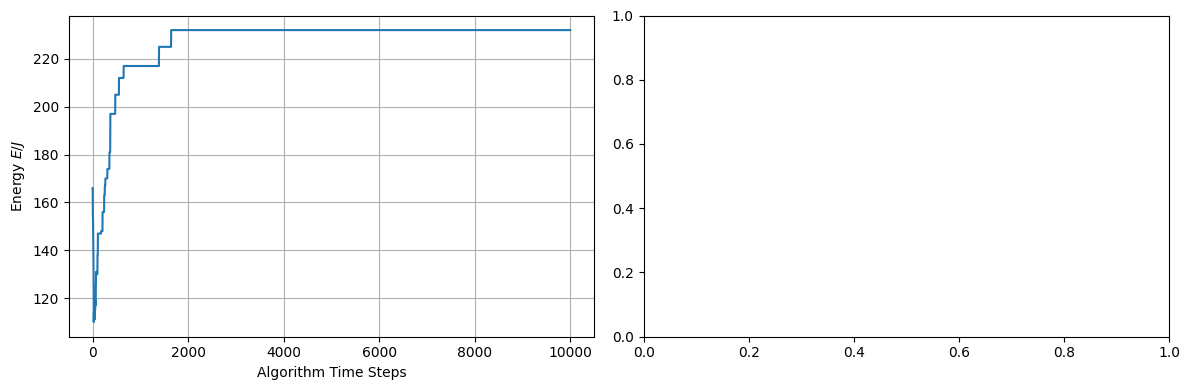

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
ax = axes[0]
ax.plot(Energy1)
ax.set_xlabel('Algorithm Time Steps')
ax.set_ylabel(r'Energy $E/J$')
ax.grid()
fig.tight_layout()
plt.show()

In [19]:
Energy, Spin= metropolis(Gen_lattice(100,0.75),0.5,10000)

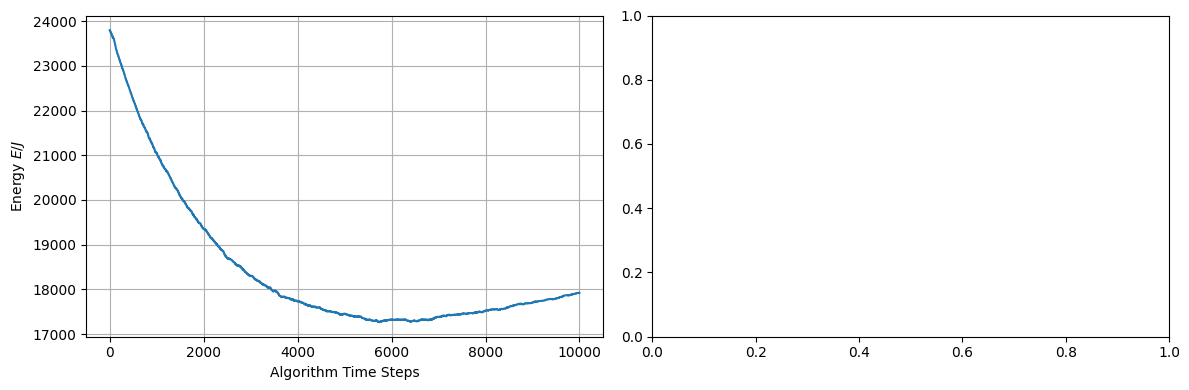

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
ax = axes[0]
ax.plot(Energy)
ax.set_xlabel('Algorithm Time Steps')
ax.set_ylabel(r'Energy $E/J$')
ax.grid()
fig.tight_layout()
plt.show()